In [12]:
import pandas as pd
import numpy as np
print(pd.__version__)
print(np.__version__) 
# pandas, numpy를 import함과 동시에 version을 알아본다.

0.23.3
1.14.5


In [6]:
import sys
sys.executable

'/usr/local/opt/python3/bin/python3.6'

In [10]:
from plotnine import *
import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition.csv', 
                 parse_dates=['start', 'end'])
df.shape

(215154, 8)

In [75]:
child = df.loc[(df.title.str.contains('정부|정책|음모|비리', regex=True)) & \
           (df.content.str.contains('정부|정책|음모|비리', regex=True))] 
child.shape

(6843, 8)

In [32]:
child.head(3)

,article_id,start,end,answered,votes,category,title,content
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
14,35,2017-08-19,2017-08-26,0,0,외교/통일/국방,문재인정부는 신한국형 페리프로세스가 작성했습니다.,문재인 대통령님 신한국형 페리프로세스 로드맵작성 했습니다.\n<신한국형 페리 프로세...
33,56,2017-08-19,2017-11-17,0,5,보건복지,장애아의 상태에 따른 장애아돌봄도우미 정책의 한계에 관하여...읽어주셨으면 하고 글...,"안녕하세요. 저는 그냥 평범한 대학생이며, 고등학생인 자폐 1급 남동생을 둔 누나입..."


In [33]:
child.tail(3)

,article_id,start,end,answered,votes,category,title,content
215087,277963,2018-06-20,2018-07-20,0,6,문화/예술/체육/언론,부정 부패와 비리로 얼룩진 한국축구협회 개혁이 시급하고 필요하다,대한축구협회는 민심을 잃은 지 오래입니다. 하지만 늘 꼬리를 자르고 방패막이를 앞세...
215107,277989,2018-06-20,2018-07-20,0,39,경제민주화,정부는 대한항공 조씨 일가 비호하지 마십시오!!,일반 국민들은 엄두도 못낼 각종 범죄를 조씨 일가가 저지른게 들통 났을 때\n전 사...
215142,278031,2018-06-20,2018-07-20,0,3396,성장동력,탈 원전 정책 반대 합니다,대선 공약이라도\n잘 못된 선택이라 판단되면 철회 하는 용기도 필요 합니다\n우리나...


In [34]:
child.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6843 entries, 1 to 215142
Data columns (total 8 columns):
article_id    6843 non-null int64
start         6843 non-null datetime64[ns]
end           6843 non-null datetime64[ns]
answered      6843 non-null int64
votes         6843 non-null int64
category      6843 non-null object
title         6843 non-null object
content       6843 non-null object
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 481.1+ KB


In [35]:
child.describe()

,article_id,answered,votes
count,6843.000000,6843.000000,6843.00000
mean,133316.635248,0.000146,204.37352
std,70826.968054,0.012089,4979.72740
min,22.000000,0.000000,0.00000
25%,82733.000000,0.000000,1.00000
50%,125757.000000,0.000000,4.00000
75%,183973.500000,0.000000,10.00000
max,278031.000000,1.000000,304320.00000


In [36]:
child.describe(include=np.object)

,category,title,content
count,6843,6843,6843
unique,17,6364,6445
top,정치개혁,쿠스노키 신조우 정부(일본 우익)로만이 추진하려는 위안부 합의 재협상에 대해 문재인...,"너 지켜 본다 가만 안둔다."" 대구 XX경찰서 고소 당해서\n증거 불충분 협의 없음..."
freq,1130,33,37


In [37]:
child['start_year'] = child['start'].dt.year
child['start_month'] = child['start'].dt.month
child['start_day'] = child['start'].dt.day
child['start_hour'] = child['start'].dt.hour
child['start_dow'] = child['start'].dt.dayofweek
child['start_wdn'] = child['start'].dt.weekday_name

# 요일을 좀 더 간단하게 표현해 봅니다.
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
child['start_dayofweek'] = child['start_dow'].apply(lambda x: days[x])
child.shape

(6843, 15)

In [38]:
child['start_month'].value_counts()

1     1802
2      901
3      834
4      744
12     641
5      604
6      409
11     358
9      292
10     183
8       75
Name: start_month, dtype: int64

In [39]:
child['start_dayofweek'].value_counts()

Tues     1151
Thurs    1124
Fri      1109
Weds     1058
Mon       916
Sun       757
Sat       728
Name: start_dayofweek, dtype: int64

In [40]:
child['start_wdn'].value_counts()

Tuesday      1151
Thursday     1124
Friday       1109
Wednesday    1058
Monday        916
Sunday        757
Saturday      728
Name: start_wdn, dtype: int64

In [121]:
(ggplot(child)
 + aes('category')
 + geom_bar(fill='green')
 + ggtitle('카테고리별 청원 수')
 + theme(text=element_text(font_path='/Library/Fonts/NanumBarunGothic.otf'),
   "  axis_text_x=element_text(rotation=60))
)
"

SyntaxError: EOL while scanning string literal (<ipython-input-121-7e36fb90ca64>, line 6)

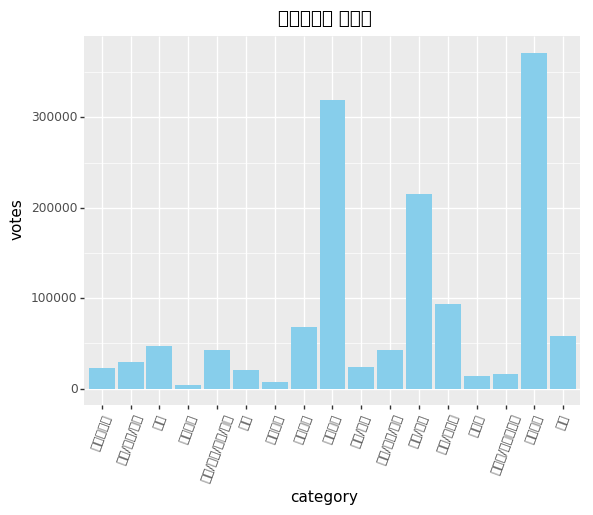

<ggplot: (-9223372036561651221)>

In [59]:
(ggplot(child)
 + aes(x='category', y='votes')
 + geom_col(fill='skyblue')
 + ggtitle('카테고리별 투표수')
 + theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=70))
)

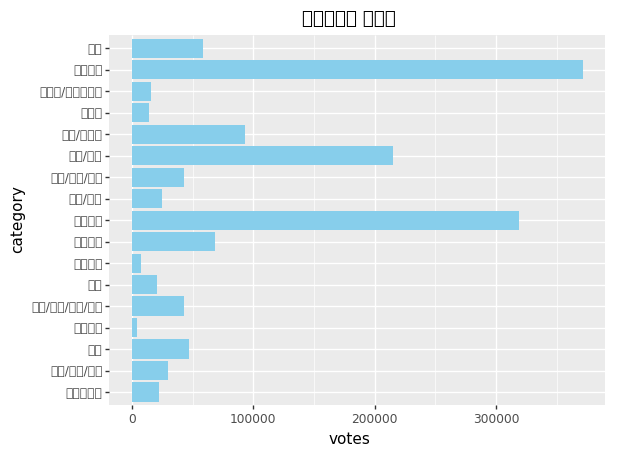

<ggplot: (293895786)>

In [60]:
(ggplot(child)
 + aes(x='category', y='votes')
 + geom_col(fill='skyblue')
 + ggtitle('카테고리별 투표수')
 + coord_flip()
 + theme(text=element_text(family='NanumBarunGothic'))
)

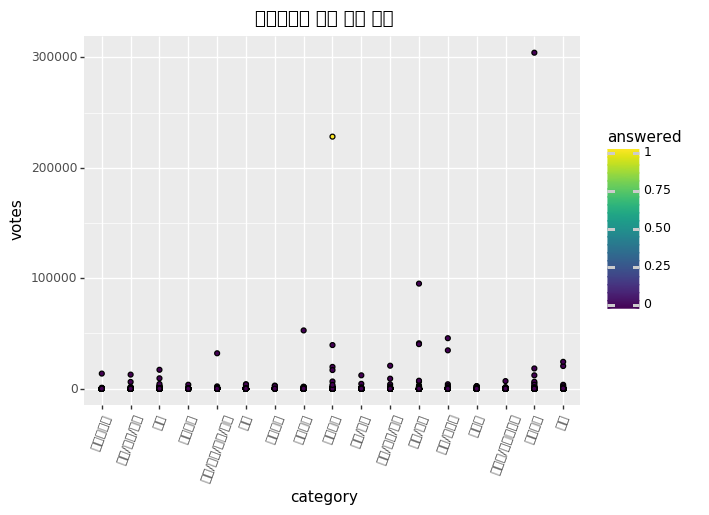

<ggplot: (294414214)>

In [61]:
(ggplot(child) 
 + aes(x='category', y='votes', fill='answered')
 + geom_point()
 + ggtitle('카테고리별 답변 대상 청원')
 + theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=70))
)

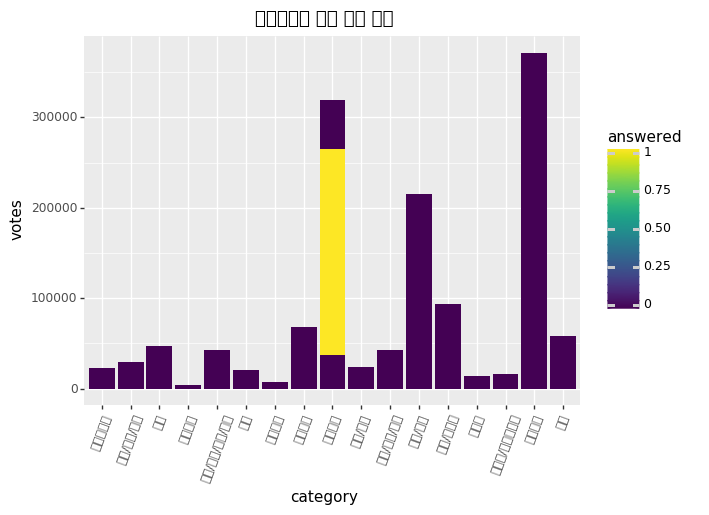

<ggplot: (292759311)>

In [62]:
(ggplot(child, aes(x='category', y='votes', fill='answered'))
 + geom_col()
 + ggtitle('카테고리별 답변 대상 청원')
 + theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=70))
)

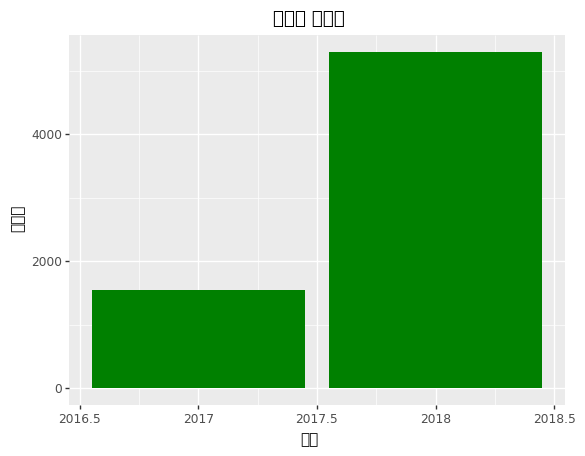

<ggplot: (-9223372036559605672)>

In [63]:
# 연도별 청원수는 크게 의미가 없다.
(ggplot(child)
 + aes('start_year')
 + geom_bar(fill='green')
 + labs(y='청원수', x='연도', title='연도별 청원수')
 + theme(text=element_text(family='NanumBarunGothic'))
)

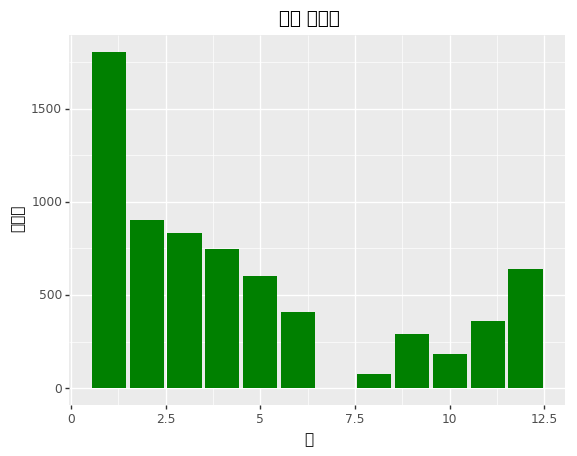

<ggplot: (-9223372036561255024)>

In [64]:
(ggplot(child)
 + aes('start_month')
 + geom_bar(fill='green')
 + labs(y='청원수', x='월', title='월별 청원수')
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [65]:
# 9월에 청원이 특히 많은데 상위 3개 날짜만 뽑아보자
child_9 = child.loc[child['start_month'] == 9]
child_9['start_day'].value_counts()[:3]

19    26
21    23
7     20
Name: start_day, dtype: int64

In [66]:
child_9_sample = child_9.loc[(child_9['start_day'] == 26) | (child_9['start_day'] == 20)]
child_9_sample[['title', 'content', 'votes']].sort_values(by='votes', ascending=False)[:20]

,title,content,votes
15164,난임 의료지원 정책의 문제점,현재 시행 예정인 난임 의료지원 정책은 나이제한과 횟수제한을 두고 있습니다.\n전 ...,98
15248,난임정책 담당자 경질을 청원합니다.,시험관 진행중인 난임부부입니다.\n이번 난임정책변경으로 난임부부들에게 더이상 경제적...,95
15174,저출산 난임지원정책의 심각성,난임정책...\n실상 얘기를 들어보니\n난임지원정책 바뀐다는 희망고문으로 횟수 리셋...,91
15207,난임지원정책 다시만들어주세요,10월부터 시행되는 난임정책...\n이게 누구를 위한것입니까\n저시험관 4차 까지 ...,77
15295,"난임 건강보험료 정책, 누굴 위한 것입니까?","안녕하세요. 대통령님.\n저는 지금까지 인공수정2회, 시험관5회(신선3회+냉동2회)...",66
17001,난임지원정책,보건복지부는 일을 하고 있는지 감사좀 해주세요. 아무리 전화해도 받지않습니다. 난임...,54
15406,난임지원정책 전면수정,난임지원정책 관련자 여러분..\n새로운 지원책에 대한 수 많은 반대 여론과 청원 확...,42
15199,부모님께서 힘들게 열심히 일한 덕분에 정부혜택은 못받네요,안녕하세요. 2년 6개월차 직장인입니다. 저는 현재 경기도에 거주중이며 부모님과 여...,2
15189,한국축구협회 비리로 인해 물갈이 부탁드립니다.,비리로 인해 축구협회를 물갈이해주세요\n김호곤 정말 기사 날때마다 꼴보기싫습니다.\...,2
15443,"중국 내 임시정부, 광복군 유적과 다른 독립운동 사적에 대한 전면적인 기록을 남겨야...","안녕하세요.\n저는 중국 충칭(重慶)에 살면서 한국기업의 노무관리 자문역, 주간지ㆍ...",1


In [67]:
child_9_sample = child_9.loc[(child_9['start_day'] == 26) | (child_9['start_day'] == 20)]
child_9_sample[['title', 'content', 'votes']].sort_values(by='votes', ascending=False)[:20]

,title,content,votes
15164,난임 의료지원 정책의 문제점,현재 시행 예정인 난임 의료지원 정책은 나이제한과 횟수제한을 두고 있습니다.\n전 ...,98
15248,난임정책 담당자 경질을 청원합니다.,시험관 진행중인 난임부부입니다.\n이번 난임정책변경으로 난임부부들에게 더이상 경제적...,95
15174,저출산 난임지원정책의 심각성,난임정책...\n실상 얘기를 들어보니\n난임지원정책 바뀐다는 희망고문으로 횟수 리셋...,91
15207,난임지원정책 다시만들어주세요,10월부터 시행되는 난임정책...\n이게 누구를 위한것입니까\n저시험관 4차 까지 ...,77
15295,"난임 건강보험료 정책, 누굴 위한 것입니까?","안녕하세요. 대통령님.\n저는 지금까지 인공수정2회, 시험관5회(신선3회+냉동2회)...",66
17001,난임지원정책,보건복지부는 일을 하고 있는지 감사좀 해주세요. 아무리 전화해도 받지않습니다. 난임...,54
15406,난임지원정책 전면수정,난임지원정책 관련자 여러분..\n새로운 지원책에 대한 수 많은 반대 여론과 청원 확...,42
15199,부모님께서 힘들게 열심히 일한 덕분에 정부혜택은 못받네요,안녕하세요. 2년 6개월차 직장인입니다. 저는 현재 경기도에 거주중이며 부모님과 여...,2
15189,한국축구협회 비리로 인해 물갈이 부탁드립니다.,비리로 인해 축구협회를 물갈이해주세요\n김호곤 정말 기사 날때마다 꼴보기싫습니다.\...,2
15443,"중국 내 임시정부, 광복군 유적과 다른 독립운동 사적에 대한 전면적인 기록을 남겨야...","안녕하세요.\n저는 중국 충칭(重慶)에 살면서 한국기업의 노무관리 자문역, 주간지ㆍ...",1


In [68]:
child.columns

Index(['article_id', 'start', 'end', 'answered', 'votes', 'category', 'title',
       'content', 'start_year', 'start_month', 'start_day', 'start_hour',
       'start_dow', 'start_wdn', 'start_dayofweek'],
      dtype='object')

In [120]:
(ggplot(child)
 + aes('start_dayofweek')
 + geom_bar(fill='green')
 + labs(y='청원수', x='요일', title='요일별 청원수')
 + theme(text=element_text(font_path ='/Library/Fonts/NanumBarunGothic.otf'))
)

PlotnineError: "Could not evaluate the 'x' mapping: 'start_dayofweek' (original error: name 'start_dayofweek' is not defined)"

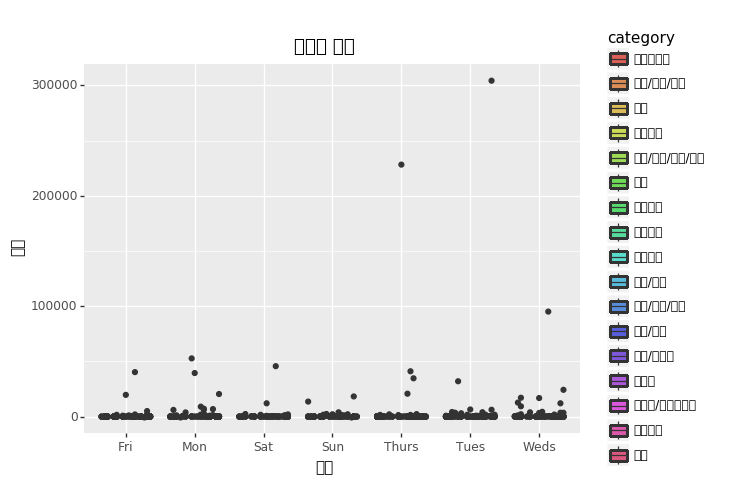

<ggplot: (294755297)>

In [71]:
(ggplot(child, aes(x='start_dayofweek', y='votes', fill='category'))
 + geom_boxplot()
 + labs(y='투표', x='요일', title='요일별 청원')
 + theme(text=element_text(family='NanumBarunGothic'))
)

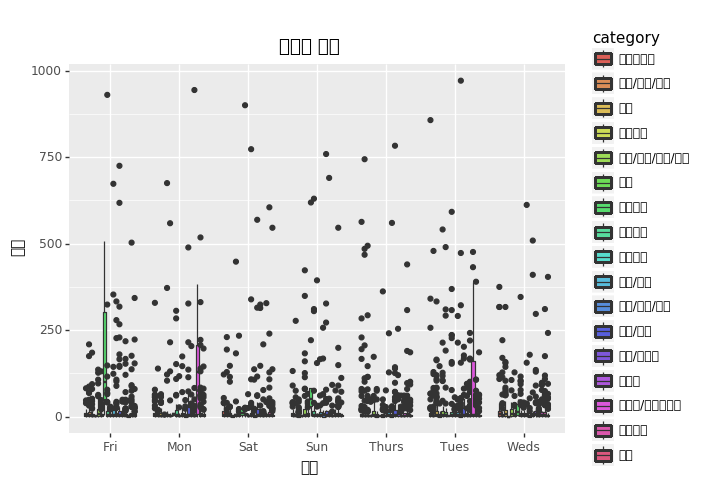

<ggplot: (292274892)>

In [72]:
child_votes_25000 = child.loc[child['votes'] < 1000]

(ggplot(child_votes_25000, aes(x='start_dayofweek', y='votes', fill='category'))
 + geom_boxplot()
 + labs(y='투표', x='요일', title='요일별 청원')
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [73]:
import re

In [76]:
p = r'.*(정부|정책|음모|비리).*'
care = df[df['title'].str.match(p) |
           df['content'].str.match(p, flags=re.MULTILINE)]
care.shape

(50358, 8)

In [77]:
care.tail()

,article_id,start,end,answered,votes,category,title,content
215114,277998,2018-06-20,2018-07-20,0,3,기타,저 신용자들의 금융권 이용 활성화 방안의 청원 제안,저 신용자들의 금융권 이용 활성화 방안의 청원 제안\n본 청원인은 1997년 IMF...
215136,278025,2018-06-20,2018-07-20,0,4,행정,내집마련의 꿈,결혼한지 거의 20년 지방거주 5년 작은집 3년전세 2년자가(1억미만)보유후 아...
215141,278030,2018-06-20,2018-07-20,0,8,기타,시골농협 조직적 수년간 공금 횡령,경남합천 가야농협 에서는 2011년8월부터 2017년7월까지 6년동안 조합장과 직원...
215142,278031,2018-06-20,2018-07-20,0,3396,성장동력,탈 원전 정책 반대 합니다,대선 공약이라도\n잘 못된 선택이라 판단되면 철회 하는 용기도 필요 합니다\n우리나...
215150,278041,2018-06-20,2018-07-20,0,63,인권/성평등,예멘 사람들을 돌려 보내세요!,"이슬람 난민을 받아들이고, 기회를 제공했던 나라에 자행 되고 있는 폭력과 테러를 보..."


In [82]:
from soynlp.tokenizer import RegexTokenizer, LTokenizer, MaxScoreTokenizer

tokenizer = RegexTokenizer()
tokenizer

In [91]:
sample_index = 215150

In [92]:
sample_title = care['title'][sample_index]
sample_title

'예멘 사람들을 돌려 보내세요!'

In [93]:
sample_content = care['content'][sample_index]
sample_content

'이슬람 난민을 받아들이고, 기회를 제공했던 나라에 자행 되고 있는 폭력과 테러를 보고 있으면서도 그들을 난민으로 여기고 자비를 베푸는 것은 곧 이 나라 국민들을 폭력과 테러로 내 모는 것과 다르지 않습니다.\\n국민의 재산과 생명을 지켜야 하는 것이 정부의 가장 큰 과제라는 것이 잊지 않았으면 합니다. 이슬람 사람들이 난민으로 들어와 가족을 이주 시키고, 이슬람 전통을 이유로 마찰을 야기 시키면 불 보든 이슬람 원리자들의 폭력과 테러가 뒤 따를 겁니다. 이는 난민을 가장 종교적으로 침투 시키고 있는 원리주의자들의 방법이기도 하지요!\\n부탁합니다! 제주에 난민으로 들어온 사람들을 돌려 보낼 수 있기를 청원합니다. 그들에게 배와 식량을 제공해서 보내는 것만이 이 땅에서 이슬람에 의한 테러와 폭력을 예방하는 유일한 방법이라는 사실을 잊지 마시기를 바랍니다.'

In [94]:
tokened_title = tokenizer.tokenize(sample_title)
tokened_title

['예멘', '사람들을', '돌려', '보내세요', '!']

In [95]:
tokened_content = tokenizer.tokenize(sample_content)
tokened_content[:10]

['이슬람', '난민을', '받아들이고', ',', '기회를', '제공했던', '나라에', '자행', '되고', '있는']

In [96]:
def preprocessing(text):
    # 개행문자 제거
    text = re.sub('\\\\n', ' ', text)
    return text

In [97]:
%time sentences = care['content'].apply(preprocessing)

CPU times: user 573 ms, sys: 957 ms, total: 1.53 s
Wall time: 3.48 s


In [ ]:
%time tokens = sentences.apply(tokenizer.tokenize)
tokens[:3]

In [99]:
tokens[sample_index][:10]

['이슬람', '난민을', '받아들이고', ',', '기회를', '제공했던', '나라에', '자행', '되고', '있는']

In [112]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = '/Library/Fonts/NanumBarunGothic.otf', 
                        stopwords = STOPWORDS, # 한국어는 해당이 없습니다. 한국어를 적용해 주려면 별도 처리가 필요합니다.
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

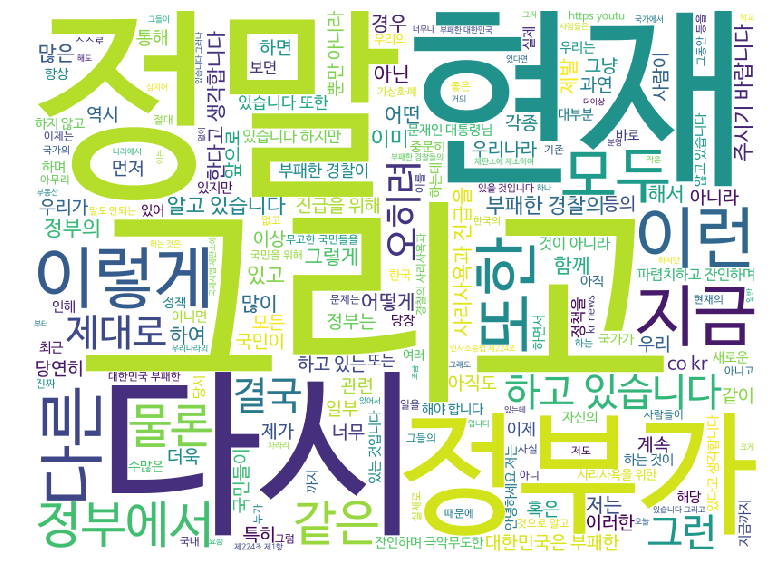

CPU times: user 2min 14s, sys: 1min 5s, total: 3min 20s
Wall time: 4min 51s


In [118]:
%time displayWordCloud(' '.join(sentences))

In [114]:
from soynlp.noun import LRNounExtractor

In [115]:
%%time
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(sentences)
nouns = noun_extractor.extract()

used default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (384311, 201340) tokens
building lr-graph completedCPU times: user 1min 54s, sys: 10.5 s, total: 2min 5s
Wall time: 2min 11s


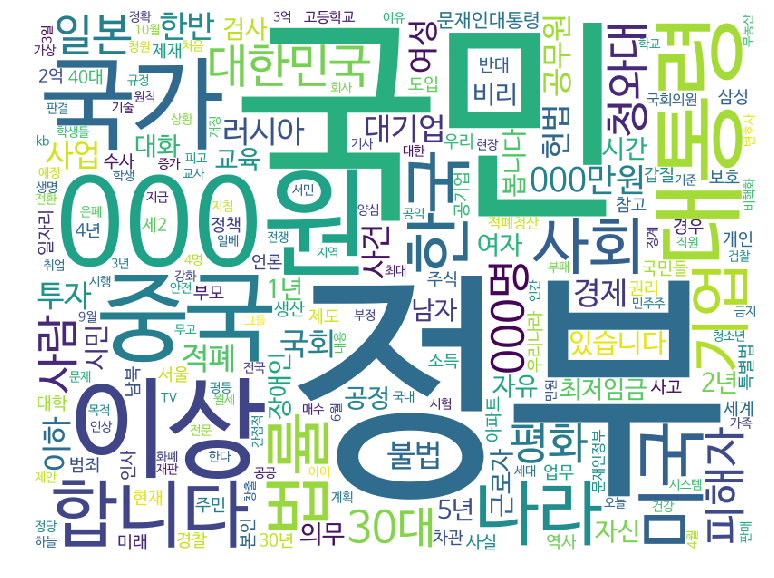

CPU times: user 2.93 s, sys: 319 ms, total: 3.25 s
Wall time: 3.66 s


In [116]:
%time displayWordCloud(' '.join(nouns))